In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Read Data

In [4]:
data = pd.read_csv("onlinefraud.csv")

In [5]:
data.shape

(6362620, 11)

#### Data Vars Illustration
There are a total of 10 variables in the dataset:

step: represents a unit of time where 1 step equals 1 hour; 

type: type of online transaction; 

amount: the amount of the transaction; 

nameOrig: customer starting the transaction; 

oldbalanceOrg: balance before the transaction; 

newbalanceOrig: balance after the transaction; 

nameDest: recipient of the transaction; 

oldbalanceDest: initial balance of recipient before the transaction; 

newbalanceDest: the new balance of recipient after the transaction; 

isFraud: fraud transaction (outcome variable); 

The key elements of this analysis have already been derived. The predictor variable ‘amount’ which represents the transaction amount, is derived from the difference between ‘oldbalanceOrg’ vs. ‘newbalanceOrg’ and ‘oldbalanceDest’ vs. ‘newbalanceDest’, which means they are redundant to each other. I would suggest removing the new balance variables from the dataset. 

The dataset covers a total of 6362620 rows. It does follows a standard data format. 


#### Correlation Analysis

<AxesSubplot:>

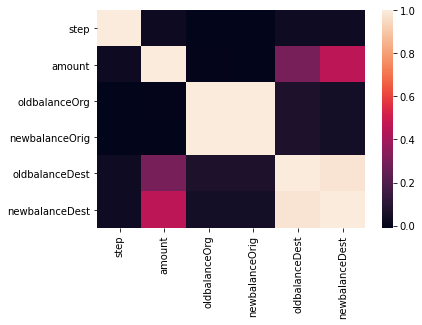

In [6]:
quant_cols = ['step', 'amount',  'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest']
cat_cols = ['nameDest','type', 'isFraud','isFlaggedFraud']
corr = data[quant_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:>

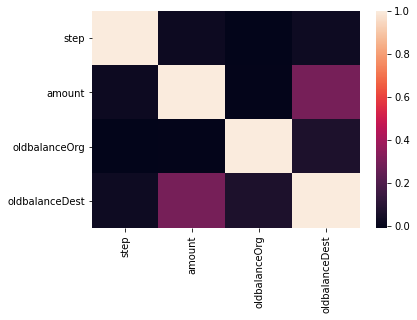

In [7]:
modified_quant = ['step', 'amount',  'oldbalanceOrg', 
       'oldbalanceDest']
corr2 = data[modified_quant].corr()
sns.heatmap(corr2, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values)

<AxesSubplot:xlabel='step'>

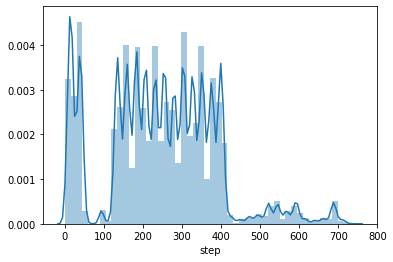

In [8]:
sns.distplot(data['step'])

<AxesSubplot:xlabel='amount'>

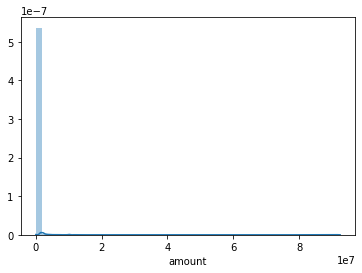

In [9]:
sns.distplot(data['amount'])

<AxesSubplot:xlabel='oldbalanceOrg'>

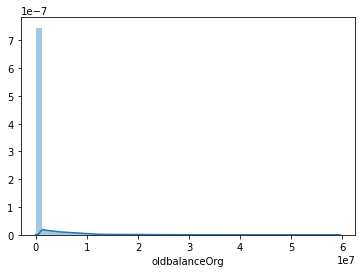

In [10]:
sns.distplot(data['oldbalanceOrg'])

<AxesSubplot:xlabel='oldbalanceDest'>

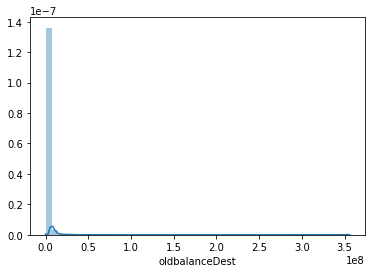

In [11]:
sns.distplot(data['oldbalanceDest'])

In [ ]:
modified_cat =['type', 'isFraud']

<AxesSubplot:>

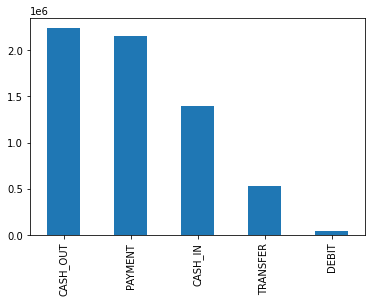

In [12]:
#visualize categorical variables
data['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

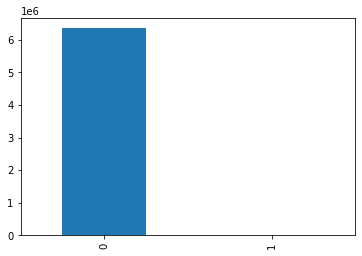

In [13]:
data['isFraud'].value_counts().plot(kind='bar')

In [14]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
data['isFlaggedFraud']=0 # will be changed later

Based on these visualizations we know: fraud transactions only occupies a small percentage of the whole dataset.  